# <font color=orage>**DATA ANALYTICS: MACHINE LEARNING APLICADO AL MARKETING DIGITAL**

Vamos a aprender el comportamiento de los usuarios que neavegan en la web, especificamente en un E-commerce (google merchandising store) que vende articulos, regalos, ropa, etc. con la marca de google. Vamos a recibir de Google Analytics informacion del comportamiento de los clientes. Vamos a tratar de pronosticar cuanto van a gastar, segun sus caracteristicas de navegacion.

## <font color=red> **PREPARACION DE DATOS**

---




### **CARGANDO LA BASE DE DATOS**

Ya nos dan la base de datos en formato csv de merchandising store, NO la extraemos nosotros de la pagina web

In [ ]:
# 1°) Importamos biblioteca y la base --->

import pandas as pd

df = pd.read_csv("base.csv")
df.head()
# Contiene los datos de navegeacion de los clientes en la web.

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
# 2°) Inspeccionamos los datos --->

df.shape

(12283, 12)

In [ ]:
# 3°) Queremos saber por ID del usuario (fullVisitorId) cuantos usuarios unicos tenemos en la base de datos --->

len(df['fullVisitorId'].unique())

9996

In [ ]:
# 4°) Ahora queremos ver el TIPO de datos que es cada columna --->

df.dtypes

# Debemos corregir algunos tipos de algunas columnas(3)

,0
channelGrouping,object
date,int64
device,object
fullVisitorId,uint64
geoNetwork,object
sessionId,object
socialEngagementType,object
totals,object
trafficSource,object
visitId,int64


In [ ]:
# 5°) Debemos cargar la base con los TIPOS(type) correctos para nuestro tipo de analisis, y lo pasamos en formato Diccionario, hacemos
# nuevamente la carga del df --->

df = pd.read_csv("base.csv", dtype={"date":object, # genero que la columna que se carga con entero lo haga como texto(objet)
                                    "fullVisitorId":object,
                                    "visitId":object})

df.head()

# No vemos mucha diferencia pero si ejecutamos  el metodo DTYPES.


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
# Vemos si cambiaron los Tipos --->

df.dtypes

# Vemos que cambairon los Tipos de los 3.

,0
channelGrouping,object
date,object
device,object
fullVisitorId,object
geoNetwork,object
sessionId,object
socialEngagementType,object
totals,object
trafficSource,object
visitId,object


### **FORMATO DE DATOS**

Antes de continuar con el formato de los datos, o antes de continuar trabajando con los datos, primero tenemos que entender de dónde vienen estos datos, qué significan estos datos. Estos datos vienen de la página web, como ya les había dicho, Google Merchandising Store, que es una página web donde podemos comprar artículos o regalos con la marca de Google.
Ahora, ¿por qué elegimos esta página web? Porque todos estos datos de los clientes o de navegación que se realizan dentro de esta página web son públicos. Son públicos en pequeñas muestras, y nosotros podemos accesar a estas informaciones a través de Google Analytics.

Google Analytics es una herramienta de web analytics de Google encargada de captar todas las informaciones de navegación de los clientes en una página web, en este caso dentro de la página web de Google Merchandising Store. Ahora, Google Analytics no es simplemente la herramienta de Google. Es una de las principales herramientas del mundo para realizar web analytics.
Entonces nosotros vamos a utilizar esta información. Ahora echemos un vistazo a Google Analytics. Esta es la cara del Google Analytics. Nosotros no necesitamos entrar o loguearnos a Google Analytics para extraer esta información porque nosotros ya la hemos descargado en una base csv que es la que estamos trabajando ahora.

Pero si ustedes desean conocer un poco más, esta es la cara del Google Analytics. Nos da la información una vez que lo linkemos a un sitio web como el Google Merchandising Store. Esto nos va a dar la información de cuántos usuarios tenemos en un periodo de tiempo. En este caso es una semana, la primera semana de febrero.
Cuántos usuarios tenemos, cuántos nuevos usuarios tenemos, los usuarios que no eran usuarios antiguamente, cantidad de sesiones, número de sesiones por usuario, el tiempo, el dinero que van gastando estos usuarios en la página web durante ese periodo de tiempo, etcétera.
Entonces tenemos mucha información aquí que podemos utilizar para mejorar nuestras campañas de marketing, para realizar un marketing más inteligente. Ahora para entender los datos que nos proporciona el Google Analytics, me parece mejor mostrárselos con un ejemplo, entonces vamos al ejemplo de José.

Vamos a presentar esto de aquí. José es una persona que entra a la página web ropas.com para realizar una navegación común. Entonces, cuando esta persona, José, entra a la página web automáticamente el Google Analytics va a generar una de las líneas que nosotros ya hemos visto en nuestro banco de datos.
En esta línea, vamos a tener información como por ejemplo esta navegación o usuario va a ser asignado con un Id, con un código de identificación de visitante, el visitorId. Entonces el Google analytics va a colocar un código para José, para el usuario José.
Va a colocar también la fecha, el tiempo, el horario que está entrando en esta visita, en este caso 4 de febrero 2018, 07:33 de la mañana. ¿Qué número de visita es? Está entrando por la primera vez, es la primera vez que está entrando a esta página web. Entonces está colocando el valor de 1, entonces esta es una información también importante.

Está entrando a través del computador personal, por ejemplo, también es una información interesante saber si está entrando por el celular, por el computador, personal, computador de trabajo, por ejemplo. Entró a través de Google, el canal, el canal de acceso, entró a través de una búsqueda de Google, por ejemplo.

La duración, el tiempo que se quedó en esta página web 10 minutos y revenue, el total gasto por el cliente, o sea, 0 dólares en este caso, es decir, el cliente entró pero no gastó nada. Entonces observe la cantidad de informaciones que Google Analytics va recolectando cada vez que nosotros entramos a una página web.

Si es que esta página web tiene Google Analytics activado, va a poder saber todo esto de nosotros y vamos a poder responder luego nosotros que somos los dueños de esta página web, una vez que capturemos o le pidamos al Google Analytics que nos envíe toda esta información, vamos a poder responder preguntas como cuál es el canal que nos genera más revenue en un mes o cuál es el device que genera más revenue digamos.
¿Será que son los celulares que generan más revenue, o será que son los computadores que generan más revenue? ¿Será que cuando yo voy a entrar a mirar, entro por el celular y cuando voy a entrar realmente a comprar, entro por el computador? Google Analytics nos va a poder responder este tipo de preguntas.

Pero esto va un poco más, digamos que José el día o luego en la tarde entró nuevamente. Entonces el Google Analytics ya sabe que es José. Entró el mismo día, pero un poco más tarde, como que al mediodía. Entonces ya sabe que es José, le coloca el mismo visitorId, el mismo código, pero le coloca como número de visita número 2, es la segunda visita de él, pero esta vez está entrando por el celular.
Esta vez no está entrando por el computador personal, sino por el celular. Y por el celular entró a través de Facebook, ya no hizo nomás una búsqueda en Google, sino que ahora, pues ya sabemos cómo son las referencias cruzadas en el mundo de los sitios web.

Tú entras por una página, en la otra página o la otra aplicación, ya se enteró de que entraste por ahí, que estás interesado en alguna cosa y ya te va enviando estos links relacionados. Entonces esta vez José recibió un link de Facebook y entró por el Facebook, se quedó 7 minutos y esta vez sí gastó 70 dólares.

Entonces resultó un poco más interesante para él lo que el Facebook le haya indicado. ¿Ahora cómo sabemos que el José es el mismo José que entró por el computador esta vez que entró por el celular? ¿Cómo las máquinas saben que es la misma persona? Existen varios tipos de formas de estas páginas web recolectar o saber que el usuario que está entrando en diferentes tiempos, en diferentes horarios es la misma persona.

Tal vez con los cookies, por ejemplo o algunos archivos de rastreo, esto es más en el área de web Analytics. Es mucha información, que es la que ayudan a las máquinas a identificar al mismo cliente. Pero lo identificó, en este ejemplo lo ha identificado entonces ya lo reconoce como segunda visita. Ahora vamos a una a una tercera ejecución.

Ahora digamos que José recibió un email, ahora es otro canal. Ahora recibió un email, pero cuando estaba en el trabajo, días después, observen la fecha, 10 de febrero, pasaron casi una semana, recibió un email para saber cómo estaba, si su pedido fue bueno, si le gustó lo que compró, etcétera. Recibió un email.
Pero como estaba en el computador del trabajo que es un computador que no usa para hacer compras personales, no lo usamos, este computador no tiene las cookies. Este computador del trabajo no tiene cookies guardadas porque estaba bloqueado por política de empresa.

Entonces, el web analytics el Google Analytics no supo reconocer a José y le asignó un nuevo código de visitante, un visitorId diferente a los anteriores. Entonces no lo está reconociendo a José y le está dando un código diferente y está indicándole que es la primera visita, que entró por el computador de trabajo por email, se quedó 5 minutos y no gastó nada.
Aquí ya aparece un problema, porque si nosotros queremos hacer analíticas por persona, por cliente, aquí ya estamos mal, ya estamos equivocándonos, estamos creyendo que son dos personas distintas cuando en realidad es una única persona distinta.
Entonces esta es uno de los grandes desafíos de web analytics y de nuestro entrenamiento también. Ahora digamos que en el mismo computador del trabajo como es un computador del trabajo, algunas personas extras o diferentes pueden accesar al mismo computador.

Digamos que ahora María está pasando por ahí y accesó a través del mismo computador de trabajo, digamos que el computador sirve por horarios, uno en la mañana y otro en la tarde. José estaba en la mañana y ahora María accesó por el mismo computador en la tarde, solo que este computador ya había guardado una cookie, porque José había entrado anteriormente.

Entonces el computador de trabajo, el mismo computador continúa creyendo que es José, y continúa asignándole el mismo, visitorId. María entró. La máquina cree que es José, pero en realidad es María. Accesó por Google y realizó una compra de 50 dólares. Este es otro de los desafíos que tenemos cuando utilizamos web analytics o Google Analytics.

Tenemos cada fila como identificador de usuario o de visita. Y la verdad, cuando nosotros vamos a realizar nuestro entrenamiento, tenemos que identificar correctamente al cliente y no a la visita, no al usuario. Tenemos que realmente ubicar al cliente entre todas estas visitas de la página web, entonces este es uno de los desafíos tanto de web analytics como dentro de nuestro entrenamiento.

Ahora, si tú quisieras realizar algún análisis por visitas, entonces esto ya estaría bien, pero si tú quieres realizar, que es lo más común que vamos a hacer en nuestro marketing digital, por cliente, entonces nosotros tenemos que crear algunos artificios, algunos artilugios, para poder identificar al cliente correctamente.
Entonces lo que vamos a hacer ahora en nuestro entrenamiento es ubicar todas las informaciones que hemos recibido de nuestra base de datos, separar las que son importantes para nosotros para el entrenamiento y estas informaciones vamos a trabajarlas para poder correctamente identificar a nuestro cliente.



### **TRABAJANDO CON DICCIONARIOS**

Tenemos que identificar las columnas de valor y trabajar con esas columnas.

In [ ]:
# 1°) Primero debemos extraer todo lo que esta contenido en formato Diccionario {} dentro de algunas columnas y formar otras columnas con esta
# informacion, examinamos la columna DEVICE --->

df.device.iloc[0] # Examinamos la primer linea[0]

# Nos devuelve mucha informacion de esta unica columna en formato de llave y valor.

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [ ]:
# 2°) Vemos que formato tiene la columna y luego tenemos que trabajar con tablas para poder visualizar de mejor manera la columna y ver que es
# lo importante extrear --->

type(df.device.iloc[0])

# Nos devuelve un STR dentro de este texto existe un Diccionario.

str

In [ ]:
# Importamos JSON para poder trabajar con Diccionarios:

import json

type(json.loads(df.device.iloc[0])) #usamos JSON.LOADS y nos devuelve un DICT y no un string

dict

In [ ]:
# Ahora vemos como quedo el DICCIONARIO con LLAVE y VALOR:

json.loads(df.device.iloc[0])

# Nos devuelve la primer linea de DEVICE en fromato diccionario con llave y valor.

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [ ]:
# 3°) Una vez convertido a Diccionario con su LLAVE y VALOR los vamos a separar a una Tabla(DataFrame) --->

pd.DataFrame([json.loads(linea)for linea in df.device]) # Para cada Linea en la columna DEVICE conviertela en un Dataframe.

# Nos devuelve todas los valores de formato llave y valor a formato tabla.

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [ ]:
# 4°) Tenemos que hacer la conversion de varias columnas del DataFrame que aparecen como Diccionario --->

diccionarios = ["device", "geoNetwork", "trafficSource", "totals"]
for columna in diccionarios:
  df = df.join(pd.DataFrame([json.loads(linea)for linea in df[columna]]))

df.head()

# Nos devuelve el DataFrame con todas las columnas con los datos que estaban en forma de Diccionario en las 4
# columnas que separamos en LLave y Valor.

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [ ]:
# 5°) Eliminamos las columnas que ya separamos en otras columnas --->

df.drop(diccionarios, axis=1, inplace=True) # donde se encuantran las columnas que quiero eliminar que no voy a usar, axis=1, para que elimine columnas.

df.head()

# Nos devuelve el DataFrame con la columnas que ya NO utilizamos.

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

### **LIMPIANDO LA BASE DE DATOS**

Tenemos 50 columnas luego del proceso anterior, pero NO es necesario llevar las 50 columnas a nuestro modelo de Machine Learning, solo las que representen una informacion de valor para el Modelo porque el tiene que aprender con esa informacion. Para esto vamos a eliminar las columnas que NO aportan informacion de valor. Para esto vamos a ver las columnas que tiene mas de un valor, mas de un resultado y NO tomamos en cuenta la que solamente contienen lo mismo de cada fila. Para esto vamos a utilizar el Metodo UNIQUE.

In [ ]:
# 1°) Examinamos la columna (channelGrouping) con el Metodo UNIQUE, para ver los valores que contiene --->

df.channelGrouping.unique()

# Nos devuelve la cantidad de valores que contiene esa columna.

array(['Organic Search', 'Affiliates', 'Direct', 'Social', 'Display',
       'Paid Search', 'Referral', '(Other)'], dtype=object)

In [ ]:
len(df['channelGrouping'].unique())

# Nos devuelve 8 valores diferentes, esto demuestra interes en la columna, NO la borramos.

8

In [ ]:
# 2°) Ahora vamos hacer lo mismo para cada una de las 50 columnas, para esto creamos una funcion (LOOP) --->

#for columna in df.columns: # Recorremos las columnas del dataframe.
 #print(columna + ": " + str(len(df[columna].unique()))) # columna:mostramos la columna, [columna].unique:cantidad de valores de columna.

# Nos devuelve un ERROR: TypeError: unhashable type: 'dict', nos dice que en alguna columna tenemos un diccionario que se nos paso por alto
# al momento de extraer el diccionario y luego borrarlo

In [ ]:
# 3°) Vamos cual es la columna que es diccionario que nos esta dando problema --->

print(columna)

# Nos devuelve la columna adwordsClickInfo, con diccionario

# Vemos que contiene la columna:
df["adwordsClickInfo"]

# Vemos que tiene un diccionario que nos muestra que el valor de la llave no esta disponible en la muestra de datos, esta
# columna contiene un unico valor y NO esta disponible, entonces la eliminamos.

totals


,adwordsClickInfo
0,{'criteriaParameters': 'not available in demo ...
1,{'criteriaParameters': 'not available in demo ...
2,{'criteriaParameters': 'not available in demo ...
3,{'criteriaParameters': 'not available in demo ...
4,{'criteriaParameters': 'not available in demo ...
...,...
12278,{'criteriaParameters': 'not available in demo ...
12279,{'criteriaParameters': 'not available in demo ...
12280,{'criteriaParameters': 'not available in demo ...
12281,{'criteriaParameters': 'not available in demo ...


In [ ]:
# 4°) Eliminamos la columna sin valor --->

df.drop("adwordsClickInfo", axis=1, inplace=True)

In [ ]:
# 5°) Volvemos a ejecutar el codigo --->

for columna in df.columns: # Recorremos las columnas del dataframe.
  print(columna + ": " + str(len(df[columna].unique())))

# Se ejecuta sin problema y nos muestra cuantos valores diferentes tiene cada columna, tenemos columna que contiene 1 valor y
# las tenemos que eliminar.

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [ ]:
# 6°) Eliminamos columnas que contienen 1 solo valor --->

columna_na = []
for columna in df.columns:
  if len(df[columna].unique()) ==1:
     print(columna + ": " + str(len(df[columna].unique()))) # Que muestre la columna con 1
     columna_na.append(columna)

# Nos devuelve las columnas con valor 1 unico.

socialEngagementType: 1
browserVersion: 1
browserSize: 1
operatingSystemVersion: 1
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
cityId: 1
latitude: 1
longitude: 1
networkLocation: 1
visits: 1


In [ ]:
# 7°) Eliminamos las columnas --->

df.drop(columna_na, axis=1, inplace=True)
df.head()

# Nos devuelve las columnas que nos quedaron con mas de 1 valor y fueron borradas  18.

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


## <font color=red> **FEATURE ENGINEERING**

---

### **ENTENDIENDO LAS VARIABLES**

En el último video habíamos conseguido limpiar las columnas de nuestro DataFrame que no aportaban nada o que no aportaría ningún valor a nuestro modelo.
Ahora que ya nos quedamos con un DataFrame un poco más reducido, unas 30 columnas, nosotros vamos a comenzar ahora el proceso de Feature Engineering, que es la selección de las columnas más importantes según el punto de vista de negocio.

Esto se acostumbra a hacer con alguien del negocio, con una persona de negocio, alguien que tenga el conocimiento por dentro del negocio y que sepa direccionarnos qué información es más importante para el negocio.
Como nosotros estamos utilizando la página de Google Merchandise Store, que es un e-commerce, entonces ya tenemos una noción de lo que contiene las informaciones de esta página web.

Nosotros, por ejemplo, podemos considerar que las interacciones de los clientes dentro de esta página web, el valor del producto, lo que se gastó, los clics, las interacciones, los procesamientos, cuando hagamos órdenes de compra y todas estas interacciones con una página web, con un e-commerce, son informaciones importantes para el negocio, para el negocio de e-commerce, que es lo que estamos haciendo ahora.

Entonces nosotros hemos llegado a seleccionar, vamos a seleccionar cuatro columnas que son fundamentales en un negocio e-commerce y lo vamos a mostrar aquí y que ya la tenemos dentro de nuestro banco de datos.

* ***NEW VISIT:***

Una de ellas es new visit. La columna new visit nos indica el número total de usuarios nuevos de la sesión, es decir, clientes que nunca habían entrado a la página web pero están entrando por primera vez.
Entonces esta es una información importante porque se refiere a clientes nuevos. Podemos aplicarle una campaña diferenciada cuando es un cliente nuevo, tal vez una campaña de fidelización, por ejemplo.

* ***PAGEVIEWS***:

La segunda columna que quiero seleccionar, que vamos a seleccionar para nuestro modelo es page views, que es el número total de páginas visitadas durante la sesión.
Nosotros hemos visto la página de Google Merchandising Store que tiene varias secciones, varias páginas de ventas, de promociones, de informaciones, etcétera. Entonces, cada una de estas interacciones dentro de las páginas que existen dentro de Google Merchandising Store es page view.
Cada vez que el usuario entre en una página diferente, en una sección distinta, el contador irá sumando un valor durante toda la sesión. Es importante también para saber la cantidad de profundidad de profundización que tiene el cliente con la página, o sea el grado de interés es importante.

* ***BOUNCES***:

Bounces. Esta columna, como su nombre en inglés nos dice, es rebotes, en el caso es clientes que entraron y salieron. Algo así como un ping pong. Entré, no me gustó, salí, entré, miré, no me interesó y salí.
Son personas o clientes o visitas que entraron a la página web por algún link o buscaron, los encaminaron, los dirigieron a esta página web, entraron, no hicieron ningún clic, ni siquiera movieron el mouse solamente para apretar el x ahí al final, y salieron de la página web. Entonces no hicieron nada. Es una interacción que no realiza ningún procesamiento dentro de la página web.
Entonces esta es una como una tasa de rechazo, es todo lo contrario a interés, entonces es una columna que también es muy importante para llevar a nuestro modelo, así que lo vamos a llevar también.

* ***HITS***

La cuarta columna es la columna hits, que es la cantidad, es todo lo contrario, es la cantidad de interacciones que la visita o el o el usuario hizo durante la sesión.
Cuántos clics, si reprodujo una imagen, si descargó un documento, si compró, si no compró, el tiempo que quedó, o sea, todas las interacciones, todos los clics, todos los movimientos que la que el usuario hizo durante la sesión se le llama hits. Y este contador es importante para saber la cantidad de interés o de interacción que la persona o el usuario hace durante la página.
Es un indicador importante para el e-commerce y también lo vamos a llevar, lo vas a llevar para nuestro modelo.

Estos son los cuatro indicadores, cuatro columnas que vamos a continuar, vamos a primero trabajar, a ver cómo llegaron los datos desde el origen de estas cuatro columnas, vamos a intentar colocarlos como un indicador numérico, si es que no lo están.
Y también vamos a revisar la variable respuesta. La variable respuesta, que es lo que queremos predecir para el modelo, que es el gasto de cada usuario

### **CORRIGIENDO VARIABLES CUANTITATIVAS**

In [ ]:
# 1°) Ejecutamos un DTYPES que contiene el tipo de datos con el cual fueron cargadas las columnas de nuestra base de datos --->

df.dtypes

# Nos devuelve las variables y entre ellas esta HITS, PAGEVIEWS, BOUNCES, NEWVISITS y TRANSACTIONREVENUE(Variable Predictora) como OBJECT(texto), tenemos que convertir estas
# variables a numeros para pder trabajar Estadisticamente.

,0
channelGrouping,object
date,object
fullVisitorId,object
sessionId,object
visitId,object
visitNumber,int64
visitStartTime,int64
browser,object
operatingSystem,object
isMobile,bool


In [ ]:
# 2°) Convertimos las 5 variables a numericas y creamos una lista --->

cuant = ["bounces", "hits", "newVisits", "pageviews", "transactionRevenue"] # "transactionRevenue" = gastos de los clientes(variable Dependiente Y)

In [ ]:
# 3°) Ahora hacemos un LOOP --->

for columna in cuant: # cuant(lista)
  df[columna] = pd.to_numeric(df[columna]) # pasalo a numerico y guardarlo en la misma columna.

In [ ]:
# 4°) Inspeccionamos los tipos --->

df.dtypes

# Los valores de la columna que seleccionamos estan en numericos.

,0
channelGrouping,object
date,object
fullVisitorId,object
sessionId,object
visitId,object
visitNumber,int64
visitStartTime,int64
browser,object
operatingSystem,object
isMobile,bool


In [ ]:
# 5°) Visualizamos las primeras filas --->

df.head()

# Vemos que las 5 columna cambiaron a numerica.

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


### **TRATANDO LA VARIABLE RESPUESTA**

Vamos a inspeccionar la variable TRANSACTION REVENUE que es la variable de gastos de los clientes, es la VARIABLE DEPENDIENTE(Y), la variable que nos va a decir que nos va a yudar a saber cuanto un cliente va a gastar en su proxima compra es Variable PREDICTORA.

In [ ]:
# 1°) NO debemos llevar valores NULOS(NAN) a nuestro modelo de ML como ocurre con los valores NAN de TRANSACTION REVENUE,
# tenemos que ver cuantos NAN tiene y ver que hacemos ---->

df.transactionRevenue

# Nos muestra las 5 primeras filas y las ultimas 5 con valores NAN.

,transactionRevenue
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
12278,NaN
12279,NaN
12280,NaN
12281,NaN


In [ ]:
# 2°) Para ver mejor cuales son los NULOS --->

df.transactionRevenue.isnull()

# Nos devuelve TRUE = NULO, FALSE = NO NULO, nos devuelve un resultado BOOLEANO, con SUM() sumamos los TRUE que los reconoce como 1 y FALSE como 0.
# Tenemos 12119 NULOS en esta columna de mi base. Estos NULOS quiere decir que el cliente NO hizo ninguna compra, le colocamos el valor 0 para
# los clientes que tienen el valor NULO

,transactionRevenue
0,True
1,True
2,True
3,True
4,True
...,...
12278,True
12279,True
12280,True
12281,True


In [ ]:
# Sumamos los NULOS--->

df.transactionRevenue.isnull().sum()

# 12119 Nulos

12119

In [ ]:
# 3°) Sustituimos el valor NULO por 0 --->

df.transactionRevenue.fillna(0, inplace=True) # fillna = sustituye los NAN por 0 en la columna.

In [ ]:
# 4°) Hacemos un VALUE_COUNTS de los valores que contiene esta columna --->

df.transactionRevenue.value_counts()

# Nos muestra los NULOS con 0 y tambien podemos ver que los valores de gasto de algunos clientes tienen muchos 0, estos datos se extraen
# de Google Analytics de la pagina web que estamos trabajando, google analytics nos aclara que el valor de gasto esta multiplicado por 6,
# se le agregan 6 ceros, tenemos que acomodar esos valores.

,count
transactionRevenue,
0.0,12119
13590000.0,3
33590000.0,3
19190000.0,3
27190000.0,2
...,...
24730000.0,1
6990000.0,1
14480000.0,1


In [ ]:
# 5°) Quitanmos los 0 adicionales de la columna de gasto --->

df.transactionRevenue = df.transactionRevenue / 1000000
# la columna es = a la columna dividido por los 6 ceros.

In [ ]:
# 6°) Hacemos un VALUE_COUNTS para ver como quedaron los valores --->

df.transactionRevenue.value_counts()

# Nos devuelve los valores de gasto acorde a los valores reales de compra, no con los 6 ceros de mas.

,count
transactionRevenue,
0.00,12119
13.59,3
33.59,3
19.19,3
27.19,2
...,...
24.73,1
6.99,1
14.48,1


### **CREANDO VARIABLES**

In [ ]:
# 1°) Hemos seleccionado las 5 columnas que nos da informacion del cliente, tambien tenemos FULLVISITORID que es la cantidad de veces que un
# cliente interactuo con la pagina, vamos a agrupar las interacciones por mismo cliente ---->

len(set(df.fullVisitorId)) # SET remueve los duplicados de la columna

# Nos devuelve las cantidad unicos de clientes que es de 9997 de una base de 12283 que tenemos, es decir que un cliente se repite mas de una vez.
# Debemos agrupar los clientes por interaccion en la pagina.

9997

In [ ]:
# 2°) Utilizando GROUPBY() agrpamos por clienes para descartar repetidos --->

df.groupby("fullVisitorId").sum()

# Nos devuelve la cantidad de filas por clientes unicos(9997) en un formato de DataFrame con el total de columnas en el banco de datos y el valor
# por cliente de cada columna, solo las columnas que son numericas que se puedan contabilizar.

,channelGrouping,date,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002365800130207040,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,0,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,0,0,/yt/about/ru/,0,0,1,1,1.0,1.0,0.0
0010286039787739137,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,0,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),0,0,0,0,4,3,0.0,1.0,0.0
0011056874471185769,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,0,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,0,0,/yt/about/,0,0,2,2,0.0,1.0,0.0
0014443856125569702,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,0,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,0,0,/yt/about/ro/,0,0,1,1,1.0,1.0,0.0
0017260116665815114,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,0,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),0,True,0,0,0,2,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996691020299725061,Referral,20161221,9996691020299725061_1482388264,1482388264,3,1482388264,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,0,True,/,0,0,10,10,0.0,0.0,0.0
9996793353803109760,Social,20161130,9996793353803109760_1480566609,1480566609,1,1480566609,Chrome,Android,1,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,0,0,/yt/about/th/,0,0,1,1,1.0,1.0,0.0
9997125062030599880,Organic Search,20170112,9997125062030599880_1484217422,1484217422,1,1484217422,Safari,iOS,1,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),0,0,0,0,8,8,0.0,1.0,0.0


In [ ]:
# 3°) Borramos las columnas que NO nos interesa --->

df.groupby("fullVisitorId")[cuant].sum() # Lista que creamos de las columnas que nos interesa.

# Nos devuelve un DataFrame que vamos a llevar para ML, clientes unicos, valores y variables Predictora(y).

,bounces,hits,newVisits,pageviews,transactionRevenue
fullVisitorId,,,,,
0002365800130207040,1.0,1,1.0,1,0.0
0010286039787739137,0.0,4,1.0,3,0.0
0011056874471185769,0.0,2,1.0,2,0.0
0014443856125569702,1.0,1,1.0,1,0.0
0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...
9996691020299725061,0.0,10,0.0,10,0.0
9996793353803109760,1.0,1,1.0,1,0.0
9997125062030599880,0.0,8,1.0,8,0.0


In [ ]:
# 4°) Guardamos el DataFrame generado --->

df_cuant = df.groupby("fullVisitorId", as_index = False)[cuant].sum() # Para quitar indices y ponderlo como columa.
df_cuant.head()

# Ya guardamos el DataFrame en la variable DF_CUANT.

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
# 5°) Vemos cuantas filas nos quedaron en el dataframe que vamos a llevar al nuestro modelo de ML --->

df_cuant.shape

(9997, 6)

***Definicion Aula:***

Bruno tiene un dataframe llamado “ciudades”, donde cada fila es una ciudad del Perú, con las siguientes columnas: ciudad, habitantes y departamento.

***Que opcion podría usar para calcular el total de habitantes por departamento?***

* **ciudades.groupby('departamento')['habitantes'].sum()**

 Como queremos el total por departamento, usaremos la columna 'departamento' como clave del groupby e posteriormente sumaremos el total de habitantes.


## <font color=red> **ENTRENANDO EL MODELO**

---

### **BASE DE ENTRENAMIENTO Y PRUEBA**

Ya construimos el DataFrame que tenemos que utilizar para nuestro modelo de Machine Learning, ya tenemos las VARIBLAES PREDICTORAS y la VARIABLE A PREDECIR (Transaction Revenue) que es el valor de gasto de cada uno.

In [ ]:
# 1°) Vamos a separar la base de Entrenamiento y Prueba --->

y = df_cuant.transactionRevenue.copy() # Y = variable con la variable Respuesta, COPY()=hacemos copia del contenido de esta columna.
x = df_cuant.drop("transactionRevenue", axis=1) # X = Variable con la predictora, con las que el modelo va a aprender, vamos a borrar
# la columna que NO es Predictora, para esto hicimos una COPIA anteriormnete para que esa columna no se afectada por el drop.

In [ ]:
# Vemos que contienen la Variable Respuesta y Variables Predictoras --->

y.head()

,transactionRevenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
x.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
0,0002365800130207040,1.0,1,1.0,1
1,0010286039787739137,0.0,4,1.0,3
2,0011056874471185769,0.0,2,1.0,2
3,0014443856125569702,1.0,1,1.0,1
4,0017260116665815114,0.0,2,0.0,2


In [ ]:
# 2°) Ahora necesitamos separar para cada una de x, y en base de Entrenamiento y Prueba --->

from sklearn.model_selection import train_test_split # Metodo psrs dividir las bases.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Ya separamos las bases en x, y

In [ ]:
# En la base x del df tenemos:

x.shape

# 9997 datos en la base total x

(9997, 5)

In [ ]:
# Ahora vemos cuantos datos tenemos en la base de entrenemiento y prueba que separamos en las Variables Predictora:

x_train.shape

# 70% de los datos

(6997, 5)

In [ ]:
x_test.shape

# 30% para prueba de los datos

(3000, 5)

In [ ]:
# Ahora vemos cuantos datos tenemos en la base de entrenemiento y prueba que separamos en las Variables Respuesta:

y_train.shape

# 70%

(6997,)

In [ ]:
y_test.shape

# 30%

(3000,)

In [ ]:
# 3°) Examinamos las primeras lineas de X_TRAIN e Y_TRAIN --->

x_train.head()

# contiene las Variable Predictoras en la proporcion que se le indico que divida para entrenamiento

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [ ]:
y_train.head()

# contiene la Variable Respuesta en la proporcion que se le indico que divida para entrenamiento

,transactionRevenue
9066,144.97
2603,0.00
8832,6.99
1579,0.00
9887,0.00


### **ENTRENANDO UNA REGRESION LINEAL**

Vamos a construir el Modelo de Machine Learning, existen varios modelos, ahora vamos a usar el mas basico pero tambien efectivo, lo que hace es intentar Predecir una Variable Cuantitativa, intenta llegar a un numero.

In [ ]:
# 1°) Importamos la biblioteca y el modelo --->

from sklearn.linear_model import LinearRegression

In [ ]:
# 2°) Guradamos el modelo en una variable, lo invocamo, entrenamos y Predecimos --->

reg = LinearRegression()
reg.fit(x_train, y_train) # Entrenamos el modelo para que entienda las Variable Predictoras y asi poder entender lo que gasto en le el cliente en base
# a los datos de y_train(variable respuesta).
reg_predict = reg.predict(x_test) # Pasamos los datos de x_test que el modelo nunca vio para ver si en el entrenamiento anterior aprendio
# para luego poder predecir el gasto
reg_predict # Examinamos las variable.

# Nos devuelve 3000 valores en formato Array de los 3000 detos de x_test que le pasamos, son 3000 resultados que la maquina cree que el cliente va a gastar.

# Para ver si los valores que Predice son correctos los vamos a comparar luego con los valores que ya tenemos en Y_TEST del gasto real del los clientes
# que nos fueron parte del entrenamiento para ver si coinciden, y ver si el modelo se entreno correctamente y predice bien.

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

### **EVALUANDO LOS RESULTADOS**

Vamos a evaluar los RESULTADOS de nuestro Modelo de Regresion Lineal, para evaluar podemos colocar el valor Real que tiene la Variable Y_TEST (valor Real de gasto de cada cliente) y colocando al lado el valor Pronosticado por el Modelo y asi ver la diferencia que hay entre los 2.

In [ ]:
# 1°) Creamos un DataFrame en blanco y para esto adicionamos columnas, REVENUE que es el valor que realmente gasto el cliente (Y_TEST) y la
# columna del PRONOSTICO(predict) que esta en la Variable REG_PREDICT y la columna ERROR diferencia entre ambas ---->

resultados = pd.DataFrame()
resultados["revenue"] = y_test
resultados["predict"] = reg_predict
resultados["error"] = reg_predict - y_test

resultados.head()

# Tenemos filas del cliente con valor 0.0 NO gasto nada, sin embargo el modelo en la columna PREDICT le asigno algun valor, esto es cuando el cliente
# No gasto nada pero el modelo piensa que segun las caracteristicas de ese cliente si gasto(ERROR 100%), en este caso el Modelo esta algo equivocado.

,revenue,predict,error
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [ ]:
# 2°) Vamos a ver los casos en que los CLIENTES si gastaron dinero --->

resultados[resultados.revenue > 0].head()

# Nos devuelve clientes que SI gastaron, podemos ver que en la gran mayoria de los casos el modelo dice que gasto valores
# mas bajos a los Reales, esta es una forma de evaluar el modelo pero existen tambien para evaluar METRICAS.

,revenue,predict,error
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275


In [ ]:
# 3°) Vamos a utilizar METRICAS, comenzaremos con el MSE, va a recorrer toda la base y evaluar --->

# MSE:

import numpy as np

np.mean((reg_predict - y_test)**2) # Se calcula manual de esta manera, MEAN=media, de la diferencia de lo que PREDIJO y el valor REAL.

807.2459296820928

In [ ]:
# RMSE: raiz cuadrada de MSE.

np.sqrt(np.mean((reg_predict - y_test)**2))

# Nos devuleve 28.41 de diferencia con el valor Real


28.412073660366516

In [ ]:
# 4°) Vamos a investigar la MEDIA de nuestros datos originales, analizamos el gasto de los clientes(media) --->

np.mean(df_cuant.transactionRevenue)

# Un cliente de la base esta gastandose aprox. 1.77 dolares, por eso nuestro Modelo al realizar los Pronosticos obtuvo un valor muy parecido a 1.77

1.778953686105832

In [ ]:
# 5°) Calculamos las DESVIACION ESTANDAR de los datos originales de los Clientes --->

np.std(df_cuant.transactionRevenue)

# Este valor quiere decir que algunos de nuestros clientes gastan 25 dolares por encima de la DESVIACION ESTANDAR.

25.129905708017944

In [ ]:
# 6°) Existe una forma mas facil de obtener los indicadores metricos de MSE Y RMSE sin realizar tantos calculos --->

from sklearn import metrics # metrics=ya tiene las funciones calculadas.

print("MSE: ", metrics.mean_squared_error(y_test, reg_predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, reg_predict)))

# Nos devuelve las METRICAS para evaluacion de ML con Regresion Lineal de forma mas rapida.

MSE:  807.2459296820928
RMSE:  28.412073660366516


### **ANALISIS GRAFICO DE LOS RESULTADOS**

In [ ]:
# 1°) Importamos biblioteca --->

import seaborn as sns


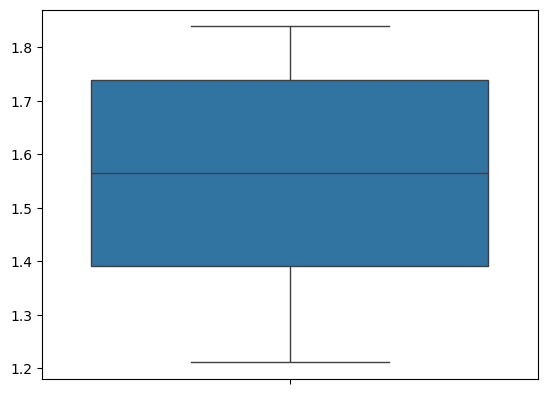

In [ ]:
# 2°) Generamos un BOXPLOT que divide los resultados en cuartiles ---->

sns.boxplot(reg_predict); # Prediccion del Moldelo

# Mediana, se encuentra en 1.6 aprox., esto quiere decir que las mayoria de los Resultados tiene como Mediana 1.6, si vemos la tabla de mas arriba vemos que varia
# el Resultado en 1.6, la mayor concentracion se encuentra entre 1.4 y 1.6, podemos ver que los valores NO son menores a 1.2 ni mayores a 1.8, pero
# en los valores Reales tenemos hasta valores de 400.

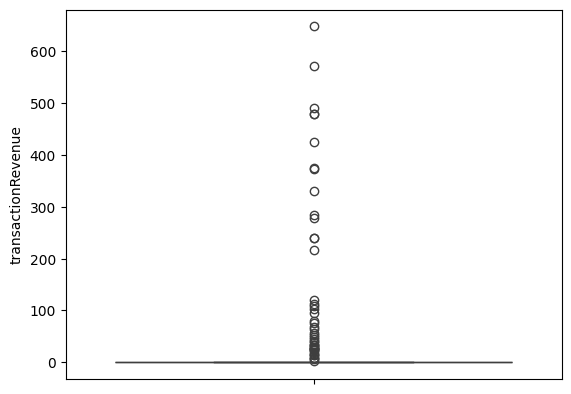

In [ ]:
# 3°) Generamos otro BOXPLOT y visulizamos los valores Reales de gastos ( Y_TEST) ---->

sns.boxplot(y_test); # Valores Reales del df.

# Podemos ver que la mayoria de los Resultados de gasto de la Variable se encuentran proximos a 0.0 casi el 90% NO gasta nada, en la tabla que creamos
# podemos ver que la columna REVENUE que es el gasto Real del cliente la mayoria ese en 0.0.

# Clientes OUTLIERS, algunos clientes que gastan mas de lo esparado por la mayoria de los Clientes, algunas veces para entrenar el Modelo se excluyen
# estos OUTLIERS.


<ipython-input-62-05903e39e1e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict - y_test); # Grafico de Distribucion de la diferencia del Error.


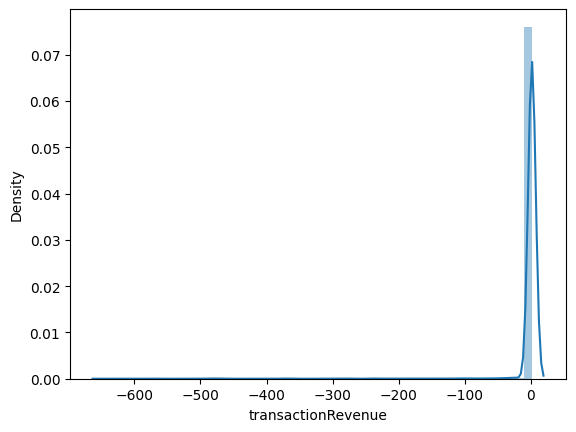

In [ ]:
# 4°) Vamos a ver el grafico del ERROR --->

sns.distplot(reg_predict - y_test); # Grafico de Distribucion de la diferencia del Error.

# Nos muestra agrupando los valores del ERROR, de la diferencia de Pronostico, donde se encuentra la cocentracion de ERRORES de nuestros clientes,
# la maypria se encuentran en un valor un poco menos a 0, esto siginifica que el ERROR en nuestra base total se encunetra entre 0, -0.1, -0.2, en
# tabla podemos ver que el ERROR  siempre ha sido un 1.5 del valor Real aprox. y es porque la mayoria de los clientes gasta 0 y el Pronostico(Prediccion)
# siempre ha sido entorno de 1.5 de gasto por cliente y el error es el mismo valor, siempre cerca de 0 como muestra el grafico.

# Debemos volver a investigar y construir un Modelo en el cual los Resultados sean con menos diferencia de lo Real a lo Pronocticado.

## <font color=red> **MEJORANDO EL FEATURE ENGINEERING**

---

### **CREANDO VARIABLES CUANTITATIVAS**

Como el modelo de ML no fue el mas optimo en porcentaje, debemos volver al inicio y construir nuevas variables o seleccionar mejore variables (FEATURE ENGINEERING), vamos a agregar Variables CUALITATIVAS (texto) y para poder agrupar esto vamos a utilizar Variables CUANTITATIVAS(numericas) como:

* VISITORID (cliente codigo)

* VISITORNUMBER(n° de visitas, NO todas las cantidades de visitas sino por la primer visita y la ultima visita)

De esta manera podremos agregar informacion CUALITATIVA(texto) al modelo.

In [ ]:
# 1°) Inspecionamos la base inicial de los clientes de la navegacion en GOOGLE MECHARISING STORE --->

df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [ ]:
# 2°) Vamos a construir nuestras Visitas,, empezamos por la ULTIMA visita, y para esto vamos a agrupar por fullVisitorId --->

visitas_ultima = df.groupby("fullVisitorId", as_index=False) # "fullVisitorId":agrupamos visitas por Id de cliente(coidgo)
visitas_ultima.head()

# Nos devuelve el DF agrupado por el cliente y con los demas valores totalizamos.

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,Social,20170104,3676568959298442968,3676568959298442968_1483582064,1483582064,1,1483582064,Edge,Windows,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,NaN,NaN,/yt/about/es-419/,NaN,NaN,1,1,1.0,1.0,0.0
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),youtube.com,referral,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1.0,1.0,0.0
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0


In [ ]:
# 3°) De la Variable que creamos queremos quedarnos con el VistitNumber(columna) cantidad de visitas y una vez agrupado por FullVisitorId del cliente
# buscamos el valor Maximo que es el nuemro de la ultima visita --->

visitas_ultima = visitas_ultima["visitNumber"].max()
visitas_ultima.head()

# Obtenemos el DF con el ID del cliente sin repeticion y la maximas de visitas que tenemos para cada cliente.

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
# 4°) Vemos la cantidad de clientes unicos que tenes en este df--->

visitas_ultima.shape

(9997, 2)

### **DEVOLVIENDO VALORES DE LA ULTIMA VISITA**

In [ ]:
# 1°) Vamos a buscar PAR de valores unicos entre FullVisitorId y VisitNumber, que ese PAR NO este duplicada la informacion(unicos) --->

usuarios_visitas_unicos = df.drop_duplicates(subset=["fullVisitorId", "visitNumber"]) # drop_duplicates=borra valores duplicados entre 2 columnas, subset=conjunto.
# ["fullVisitorId", "visitNumber"] = Buscamos en este PAR de valores y borramos los Duplicados y nos quedamos con los unicos.
usuarios_visitas_unicos.head()

# Nos devuelve el DF con fullVisitorId y VisitorNumber con el PAR de valores unicos, NO hay duplicados.

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [ ]:
# 2°) Vemos cuantos registros nos quedaron ---->

usuarios_visitas_unicos.shape

# Nos quedaron 12270 registros que era casi el total de la base.

(12270, 31)

In [ ]:
# Vemos cuantos registros tenemos en el total de la base --->

df.shape


(12283, 31)

In [ ]:
# 3°) Vamos a buscar en el DF las columnas que nos faltan y lo vamos a rellenar en VISITAS_ULTIMA, para esto debemos hacer un JOIN de
# los 2 DataFrame que generamos el DataFrame final ---->

visitas = pd.merge(visitas_ultima, usuarios_visitas_unicos, left_on=["fullVisitorId", "visitNumber"], right_on=["fullVisitorId", "visitNumber"],
                   how="left")

# MERGE = combinar, VISITAS_ULTIMA = 1er DataFrame clientes codigo y visitar,USUARIOS_VISITAS_UNICOS= 2da DataFrame con el resto de columnas y
# sin Duplicados, LEFT_ON= colocamos a visitas_ultima a la izq, indica la columna a traves de las cuales va a ser el cruce entre los 2 df(JOIN)
# RIGHT_ON= la columna del 2do DataFrame donde va a buscar el JOIN que son la mismas, HOW= Como se va hacer el cruce OIN quien tiene la prioridad,
# cual es la base de busqueda, LEFT=  que priorice en VISITAS_ULTIMA= que tiene los 9997 clientes unicos a el se le va a rellenar con el DataFrame.

# Nos devuelve las columnas que hicimos el JOIN con los 9997 sin Duplicados y por cantidad MAX de visitas de acuerdo al codigo del Cliente
# de la ULTIMA VISITA DE LA COLUMNA VISITNUMBER

visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [ ]:
#Vemos cantida de usuarios del nuevo DF--->

visitas.shape

(9997, 31)

### **DEVOLVIENDO VALORES DE LA PRIMERA VISITA**

In [ ]:
# 1°) Vamos a utilzar el codigo de la ULTIMA VISITA para buscar la PRIMER VISITA del cliente, vamos a agrupar por FULLVISITORID --->

visitas_primera = df.groupby("fullVisitorId", as_index=False)
visitas_primera = visitas_primera["visitNumber"].min() # Primera navegacion del cliente.
visitas_primera.head()

# Nos figura 6 en la ultima fila y NO 1 porque estamos usando una base de datos extraida de GOOGLE ANALYTICS que fue de la primer semana de febrero, del
# del dia 1 al 7, en este periodo muchos clientes ya entraron a la pagina en enero, diciembre, ya NO es su Primer visita, pero es la primer visita en
# ese periodo de ferbrero de la base de datos que estamos usando.

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
# 2°) Vamos a colocar la columna PRIMERA VISITA al dataframe que ya contiene la ULTIMA VISITA, antes vamos a convertir FULLVISITORID en INDICE
# para que no pase al dataframe como columna y se duplique y solo adicionar la columna de visitNumber --->

visitas_primera.set_index("fullVisitorId", inplace=True) # set_index=para reemplazar la variable por Indice.
visitas_primera.head() # Ya nos devuelve el FULLVISITORID como INDEX y deja de ser columna.

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [ ]:
# 3°) Ahora si podemos hacer un JOIN para pasar la columna VISIT NUMBER al dataframe --->

visitas = visitas.join(visitas_primera, how="left", on="fullVisitorId", rsuffix = "_primera") # "fullVisitorId"=llave, rsuffix = "_primera"=Para que la columna se
# adicione con el nombre de Primera y NO se sobreescriba con la que ya esta que tiene el mismo nombre.
visitas.head()

# Ya nos devuelve la PRIMERA VISITA del cliente al dataframe con las columnas y la columna de VISIT NUMBER de las ultimas visitas tambien.

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primera
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [ ]:
# 4°) Vemos que NO se hayan adicionado filas al dataframe de usuarios unicos(9997) --->

visitas.shape

(9997, 32)

In [ ]:
# 5°) Ahora vamos a hacer un MERGE para que nos de el resultado final --->

visitas = pd.merge(visitas, usuarios_visitas_unicos, left_on=["fullVisitorId", "visitNumber_primera"], right_on=["fullVisitorId", "visitNumber"],
                   how="left", suffixes = ["_ultima", "_primera"]) #suffixes= A los que ya existen adiciona la palabra _ultima al final y los nuesvo adiciona _primera.
visitas.head()

# Nos devuelve un dataframe que contiene todas las columnas Cuantitativas y Cualitativas del Dataframe original para la PRIMERA VISITA y ULTIMA VISITA,
# agrupado por Cliente.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,visitNumber_primera,channelGrouping_primera,date_primera,sessionId_primera,visitId_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,continent_primera,subContinent_primera,country_primera,region_primera,metro_primera,city_primera,networkDomain_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,hits_primera,pageviews_primera,bounces_primera,newVisits_primera,transactionRevenue_primera
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not av

### **LIMPIANDO LA BASE DE DATOS**

Ya tenemos el DataFrame VISITAS con las informaciones unicas por cliente que contiene columnas Cualitativas y Cuantitativas tanto para la PRIMERA y ULTIMA navegacion del cliente.

In [ ]:
# 1°) Vamos a analizar cuantas informaciones tenemos que excluir para llevar al Modelo de MACHINE LEARNING, tenemos 62 columnas y por lo menos
# tenemos que llegar a la mitad de ellas, vamos a limpiar la base --->

# Podemos ver que ya habiamos utilizado una Lista anteriormente con algunas columnas que nos daban informacion cuantitativa de la navegacion de
# los cliente como ya tenemos esos datos para cada columna en base a la PRIMER VISITA y ULTIMA VISITA del cliente, ya no la necesitamos:

cuant = ["bounces", "hits", "newVisits", "pageviews", "transactionRevenue"]
# Hacemos un LOOP:
for columna in cuant: # Recorremos las columnas de la lista CUANT en Visitas y eliminamos
  visitas.drop(columna + "_ultima", axis=1, inplace=True) # Como cambiamos los nombres a primera y ultima las columnas segun navegacion del cliente
  visitas.drop(columna + "_primera", axis=1, inplace=True) # debemos borrar las 2

visitas.head()

# Nos devuelve el dataframe sin las columnas.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,sessionId_primera,visitId_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,continent_primera,subContinent_primera,country_primera,region_primera,metro_primera,city_primera,networkDomain_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [ ]:
# 2°) Podemos ver que tenemos informacion como SESSIONID, VISITID  y nos interesa solamente el ID de FULLVISITORID del cliente, vamos a
# eliminar el resto de los ID --->

# Creamos lista para eliminar:
ids = ["sessionId_ultima", "sessionId_primera", "visitId_ultima","visitId_primera" ]
visitas.drop(ids, axis=1, inplace = True)
visitas.head()

# Nos devuleve que nos quedan 48 columnas una vez borradas estas.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,continent_primera,subContinent_primera,country_primera,region_primera,metro_primera,city_primera,networkDomain_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [ ]:
# 3°) Como son muchas las columnas del dataframe vamos a visualizarla a todas primero y ver si podemos borra alguna a simple vista --->

visitas.columns

# Podemos ver variables de region, localizacion que nos indica desde donde se conecto el cliente, vamos a intentar NO llevarlas a nuestro
# modelo de ML ya que NO tiene mucha informacion que nos interese, salvo la ultima geolocalizacion del cliente que nos puede decir de que
# pais se gastto mas. En caso de que el area de E-COMMERCE lo requiera si lo tendremos en cuenta.

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primera', 'channelGrouping_primera',
       'date_primera', 'visitNumber_primera', 'visitStartTime_primera',
       'browser_primera', 'operatingSystem_primera', 'isMobile_primera',
       'deviceCategory_primera', 'continent_primera', 'subContinent_primera',
       'country_primera', 'region_primera', 'metro_primera', 'city_primera',
       'networkDomain_primera', 'campaign_primera', 'source_primera',
       'medium_primera', 'keyword_prim

In [ ]:
# 4°) Nos quedamos con la informacion de geolocalizacion ultima del cliente que visito la pagina --->

geo = ['continent_primera', 'subContinent_primera','country_primera', 'region_primera', 'metro_primera', 'city_primera','networkDomain_primera']

visitas.drop(geo, axis=1, inplace=True)
visitas.head()

# Borramos la geo de la primer visita del cliente y nos quedamos con la ultima.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [ ]:
visitas.columns # Para ver que nos quedo.

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primera', 'channelGrouping_primera',
       'date_primera', 'visitNumber_primera', 'visitStartTime_primera',
       'browser_primera', 'operatingSystem_primera', 'isMobile_primera',
       'deviceCategory_primera', 'campaign_primera', 'source_primera',
       'medium_primera', 'keyword_primera', 'isTrueDirect_primera',
       'referralPath_primera', 'adContent_primera', 'campaignCode_primera'],
      dtype='object')

### **CREANDO VARIABLES DIVERSAS**

Vamos a adicionar columnas de valor, y tenemos las variables Cuantitativas agrupadas por clientes y cada una de las columnas cunatitativas en el DF_CUANT, ahora vamos a traerlas de nuevo y colocarlas en el DataFrame visitas.

In [ ]:
# 1°) Vemos que tiene nuevamente DF_CUANT --->

df_cuant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
# 2°) Vemos a tener esos datos CUANTITATIVOS usando un MERGE(cruce entre 2 dataframe) --->

visitas = pd.merge(visitas, df_cuant, left_on=["fullVisitorId"], right_on = ["fullVisitorId"], how = "left")
# fullVisitorId=cruzamos por cliente
visitas.head()
# Nos devuelve las columnas en el dataframe vista con la informacion Cuantitativa.


,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [ ]:
# 3°) Tenemos un visitStartTime_ultima y visitStartTime_primera que es un numero (ID) de una fecha en que el cliente realizo en este caso la
# ultima navegacion y la primera, fue grabada pero en formato numerico, esto NO nos va a servir porque no nos dice nada informativo para el
# modelo de ML, pero si restamos el tiempo de la primera vez que entro a la web y la ultima tendremos el tiempo que el usuario estuvo en la
# en la web, tendriamos informacion de si los clientes navegan por mas tiempo gastan mas, vamos a crear esta info a partir de estas columnas --->

visitas["tiempo_dif"] = visitas.visitStartTime_ultima - visitas.visitStartTime_primera # Creamos la columna Diferencia de Tiempo.
visitas.head()

# Nos devuelve la columna creda con el tiempo de diferencia, si hizo una unica visita a la web la diferencia 0.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,transactionRevenue,tiempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


In [ ]:
# 4°) Vamos a adicionar la cantidad de veces que un cliente se ha conectado a la pagina web, podria ser util para ver el gasto en realacion a la cantidad
# de veces que navega, usamos el dataframe original ---->

visits = df.groupby("fullVisitorId", as_index=False).count() # Agrupamos por cliente y hacemos un Count
visits.head()

# Nos devuelve que para cada fullVisitorId me va a traer la cantidad de veces que encontro un valor en cada columna o si encuentras el valor 3
# visitas.

,fullVisitorId,channelGrouping,date,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1
1,0010286039787739137,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1
2,0011056874471185769,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1
3,0014443856125569702,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1
4,0017260116665815114,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,1


In [ ]:
# 5°) Los que nos interesa es el VisitNumber(cantidad de visitas), vamos a pedirle al codigo que solo cuente para esa columna --->

visits = df.groupby("fullVisitorId", as_index=False).count().visitNumber.values # Agrupamos por cliente y hacemos un Count y que nos devuelva los values de visitNumber
visits

# Nos devuleve la cantidad en forma de array donde el primer 1 seria el valor del prier cliente.

array([1, 1, 1, ..., 1, 1, 2])

In [ ]:
# 6°) Adicionamos la cantidad de visitas al dataframe, generamos una nueva columna --->

visitas["visits"] = visits
visitas.head()

# Nos devuelve al final del dataframe visitas la columna con la cantidad de visitas del cliente

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,transactionRevenue,tiempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [ ]:
# 7°) Tenemos el dia de visita que realizo la primera y ultima vez, si separamos el AÑO, MES y DIA quizas la maquina pueda econtrar alguna relacion, como
# por ejemplo en que mes, año y dia existen mas ventas, por ejemplo en DATE_ULTIMA el formato esta en formato texto por mas que lo veamos como un
# numero (20160904) --->

# SLICING : Vamos a utilizar este metodo para dividir parte de un texto, colocando Indice de las posiciones desde donde queremos separar o dividir.

data = "20160904"
data

'20160904'

In [ ]:
# Como separar o dividir con SLICING:

print(data[0:4])
print(data[4:6])
print(data[6:8])

2016
09
04


In [ ]:
# 8°) Ahora vamos a crear columna para guardar estas informaciones, para esto vamos a usar LIST COMPREHENSION, ya que teniendo todas las
# fechas en una lista, podemos recorrer la lista y ejecutar el SLICING para cada elemento --->

[data for data in visitas.date_ultima]

# Nos devuelve la lista con todas las fechas.

['20160904',
 '20160928',
 '20161205',
 '20161002',
 '20170420',
 '20170210',
 '20160903',
 '20160902',
 '20170519',
 '20161002',
 '20170528',
 '20170630',
 '20170611',
 '20161123',
 '20161205',
 '20161017',
 '20170417',
 '20161007',
 '20170611',
 '20161101',
 '20161101',
 '20170210',
 '20170722',
 '20170621',
 '20160903',
 '20160910',
 '20161213',
 '20160911',
 '20170801',
 '20170528',
 '20161007',
 '20170109',
 '20170325',
 '20160812',
 '20160904',
 '20160910',
 '20160812',
 '20161224',
 '20161017',
 '20160812',
 '20170106',
 '20161118',
 '20170504',
 '20160914',
 '20161226',
 '20170529',
 '20170504',
 '20160802',
 '20170504',
 '20170417',
 '20170222',
 '20170203',
 '20160914',
 '20161205',
 '20160903',
 '20160812',
 '20170502',
 '20170106',
 '20170210',
 '20160810',
 '20160910',
 '20160922',
 '20161017',
 '20170111',
 '20170223',
 '20161002',
 '20170210',
 '20161123',
 '20161013',
 '20170111',
 '20161213',
 '20160914',
 '20170608',
 '20170210',
 '20170611',
 '20161112',
 '20170110',

In [ ]:
# Hacemos la ultima visita de cada cliente por Año, Mes, Dia:

visitas['año_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

# Hacemos la primera visita de cada cliente por Año, Mes, Dia:

visitas['año_primera'] = pd.to_numeric([data[0:4] for data in visitas.date_primera])
visitas['mes_primera'] = pd.to_numeric([data[4:6] for data in visitas.date_primera])
visitas['dia_primera'] = pd.to_numeric([data[6:8] for data in visitas.date_primera])

visitas.head()

# Nos devuelve las fechas separadas en la ultima parte del dataframe.

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,transactionRevenue,tiempo_dif,visits,año_ultima,mes_ultima,dia_ultima,año_primera,mes_primera,dia_primera
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [ ]:
# 9°) Vemos los tipos para ver si nos quedaron en numerico --->

visitas.dtypes

# Nos devuelve todos numericos(año,mes,dia en int64)

,0
fullVisitorId,object
visitNumber_ultima,int64
channelGrouping_ultima,object
date_ultima,object
visitStartTime_ultima,int64
browser_ultima,object
operatingSystem_ultima,object
isMobile_ultima,bool
deviceCategory_ultima,object
continent_ultima,object


## <font color=red> **ENTRENANDO NUEVOS MODELOS**

---

### **IDENTIFICANDO LOS TIPOS DE COLUMNAS**

In [ ]:
# 1°) Vamos a eliminar la columna FULLVISITORID porque no nos brinda ninguna informacion ya que es el ID del cliente --->

visitas.drop("fullVisitorId", axis=1, inplace=True)

# Ya NO tenemos esta columna.

In [ ]:
# 2°) Vamos a construir nuevamente nuestro modelo y para esto vamos a separar la base de datos, una base solamante con las Variable Predictoras, las
# variables sobre las cuales el modelo va a aprender y otra con la Variable Respuesta --->

y = visitas.transactionRevenue.copy() # Variable Respuesta del gasto del cliente, copy()=para que no se vea afectada posteriormente

x = visitas.drop("transactionRevenue", axis=1) # Eliminamos esta columna que es la Variable Respuesta y todas las columnas restantes
# seran columnas Predictoras.
x.head()

# Nos devuelve ñas 52 columnas con las variables Predictoras, que serviran para que el modelo aprenda.

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,tiempo_dif,visits,año_ultima,mes_ultima,dia_ultima,año_primera,mes_primera,dia_primera
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
# 3°) Vamos a examinar el tipo de datos que tenemos en nuestro dataframe VISITAS --->

visitas.dtypes

# Tenemos columnas con informacion numerica y columnas de texto (cualitativas-object)
# Sabemos que para un modelo de ML NO podemos llevar columnas de texto, ya que el modelo tardaria mas en aprender y cometeri varios
# errores, de alguna manera debemos transformar el tipo de columnas como channelGrouping_ultima.

,0
visitNumber_ultima,int64
channelGrouping_ultima,object
date_ultima,object
visitStartTime_ultima,int64
browser_ultima,object
operatingSystem_ultima,object
isMobile_ultima,bool
deviceCategory_ultima,object
continent_ultima,object
subContinent_ultima,object


In [ ]:
# 4°) Vamos a identificar las columnas de tipo texto y guardarlas en una lista --->

visitas.dtypes[visitas.dtypes ==object].values

# Nos devuelve en forma de ARRAY los tipos de columnas OBJECT.

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O')], dtype=object)

In [ ]:
# 5°) Ahora necesitamos los nombres de las columnas para esto usamos el metodo KEYS() y la guardamos en una variable --->

cuali = visitas.dtypes[visitas.dtypes ==object].keys()
cuali

# Nos devuelve los nombres de las coliumnas con tipo texto y la guardamos en una Variable, ahora podemos realizar algun tratamiento
# para convertir de texto a numero.



Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primera', 'date_primera',
       'browser_primera', 'operatingSystem_primera', 'deviceCategory_primera',
       'campaign_primera', 'source_primera', 'medium_primera',
       'keyword_primera', 'isTrueDirect_primera', 'referralPath_primera',
       'adContent_primera', 'campaignCode_primera'],
      dtype='object')

### **LABEL ENCODER**

Ya tenemos las columnas separadas de tipo OBJECT, de tipo texto las variables cualitativas, vamos a recorrer cada una de los elementos de nuestra Variable CUALI para convertir 1 a 1 en numericas, como por ejemplo la columna BROWSER que tiene texto a numero.

In [ ]:
# 1°) Tenemos en PYTHON una biblioteca llamada LABEL ENCODER, con este recurso podemos codificar un Label, convertir a numero
# un texto --->

from sklearn.preprocessing import LabelEncoder # Importamos biblioteca.

In [ ]:
# 2°) Vamos a ver con un ejemplo como funciona con la columna OPERATING SYSTEM_ULTIMA(sistema operativo que el cliente entre la ultima vez), en
# este metodo se recibe com parametro el nombre de la columna donde se encuentra el dato de texto y va a aprender con cada uno de los valores
# que encuentre en esa columna, y para cada uno de los valores unicos va a crear un nuemro aleatorio y lo aplicamos a la columna que que
# queremos convertir --->

strings = x.operatingSystem_ultima.values.astype("str") # X = donde se encuentra la Variable Predictora, values.astype("str") = Para asegurarnos
# que todos los valores de la columna este en texto y NO por ejemplo que sea un punto(.) o un Nan.

In [ ]:
# 3°) Una vez asignado toda la columa a texto invocamos a nuestro LABEL ENCODER, la inicializamos --->

lbl = LabelEncoder() # Instanciamos para que exista

In [ ]:
# 4°) Ahora utilizamos Label Encoder --->

lbl.fit(strings) # FIT = va a entrenar, enseñar a nuestro LabelEncoder a memorizar los valores unicos de alguna columna para que pueda
# asignarle un numero.

LabelEncoder()

In [ ]:
# 5°) Ahora podemos aplicarlo con el metodo TRANSFORM para que lo aplique a la columna --->

lbl.transform(strings)

# Nos devuelve un array con numeros que son equivalente a los valores texto de las columnas, 9=windows

array([ 9,  3,  9, ..., 11,  1,  9])

In [ ]:
# 6°) Ahora la aplicamos a las demas columnas de texto que tenemos guardados en la variable CUALI, recorremos cada columna
# con un FOR y aplicamos ---->

for columna in cuali:
  lbl = LabelEncoder() # Creamos nuestro LabelEncoder
  strings = list(x[columna].values.astype("str")) # LIST=para que no nos devuelva en formato array, para cada columna del dataset x los convertimos
  # en tipo texto, para asegurarnos que todos los valores son de tipo texto.
  lbl.fit(strings) # Aprende
  x[columna] = lbl.transform(strings) # Aplicamos, x[columna]= para q se guarden en la columna, que sustituya los valores texto a numericos.

In [ ]:
# 7°) Inspeccionamos --->

x.head()

# Ya nos devuelve las columna de variable x cualitativas predictoras en numero.

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primera,channelGrouping_primera,date_primera,visitNumber_primera,visitStartTime_primera,browser_primera,operatingSystem_primera,isMobile_primera,deviceCategory_primera,campaign_primera,source_primera,medium_primera,keyword_primera,isTrueDirect_primera,referralPath_primera,adContent_primera,campaignCode_primera,bounces,hits,newVisits,pageviews,tiempo_dif,visits,año_ultima,mes_ultima,dia_ultima,año_primera,mes_primera,dia_primera
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
x.dtypes

# Los tipos de Variables Predictoras con numericos o booleanos.

,0
visitNumber_ultima,int64
channelGrouping_ultima,int64
date_ultima,int64
visitStartTime_ultima,int64
browser_ultima,int64
operatingSystem_ultima,int64
isMobile_ultima,bool
deviceCategory_ultima,int64
continent_ultima,int64
subContinent_ultima,int64


***Defincion:***

**Variables categóricas**

Gabriela está entrenando un modelo de regresión para predecir la demanda de ventas de su tienda física en los próximos meses. En su base de datos cuenta con variables predictoras de tipo categóricas y cuantitativas.

Al realizar el fit del modelo de regresión, ella recibió como error del algoritmo la notificación de que no puede usar variables categóricas como input del modelo.

**¿Cómo puede corregir este error?**

* Tratar las variables categóricas, con métodos que las conviertan en una representación numérica.
Se pueden utilizar varios métodos para transformar las variables categóricas en representaciones numéricas. Como ejemplo utilizamos **LabelEncoder.**

### **ENTRENANDO UNA REGRESION LINEAL**

Ya tenemos nuestro DataFrame X, que es este DataFrame que contiene solamente las variables predictivas que vamos a enviar como parámetro a nuestro modelo, las informaciones contenidas en este DataFrame son únicamente numéricas o de tipo booleanas, que sirven como entrada para un modelo de Machine learning.

También vamos a recordar que no solamente estamos utilizando las variables originales del DataFrame, sino que hemos creado nuestras propias variables a partir de informaciones originales que recibimos del Google Analytics, como las fechas las hemos separado en año, mes y día, el tiempo de visita, el tiempo entre la primera y la última navegación, la cantidad de visitas, el total de pageviews, new visits, etcétera.

Hemos trabajado mucho con nuestro banco de datos y en realidad esto es lo que hace un científico de datos. El 70% del trabajo es limpieza y preparación de los datos. Ahora, vamos al 30% restante, vamos a generar nuestro modelo de Machine Learning.

La forma de generar el modelo de Machine Learning ya la hemos trabajado anteriormente. Vamos a continuar realizando una regresión lineal, vamos a colocar aquí Regresión lineal, que es lo que vamos a hacer y vamos a reaprovechar los códigos.

In [ ]:
# 1°) Vamos a reutilizar los codigos anteriores de REGRESION LINEAL, ya importamos las bibliotecas necesarias anteriormente --->

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Ya creamos nuestras bases separadas en Entrenamiento y Prueba.

In [ ]:
# 2°) Ahora vamos a utilizar nuestro modelo de Regresion Lineal, entrenamos y predecimos --->

reg = LinearRegression()
reg.fit(x_train, y_train)
reg_predict = reg.predict(x_test) # Va PREDECIR el gasto del cliente que NO he utilizado para entrenar el modelo.

In [ ]:
# 3°) Vamos a mostrar algunos valores de PREDICCION --->

reg_predict

# Nos devuelve valores positivos y negativos, los negativos porque la prediccion se va Desviando del Vlor Medio para abajo o para arriba
# si el Valor Medio es casi 0 entonces el valor Desviado para abajo suele ser un nuemero negativo, si el cliente NO gasta sera 0, pero
# nuna menos de 0, debemos corregir eso.

array([ 0.14603619, -1.96348472, -2.46166531, ...,  1.53300882,
       -6.00921421,  0.75577927])

In [ ]:
# 4°) Vamos a corregir los valores Negativos, siempre que sea neagtivo que le coloque 0, porque NO existen gastos menores a 0 --->

reg_predict[reg_predict < 0] = 0 # Menores a o sobreescribe con 0 y no con negativos.
reg_predict

# Ya nos devuelve valores positivos

array([0.14603619, 0.        , 0.        , ..., 1.53300882, 0.        ,
       0.75577927])

In [ ]:
# 5°) Ahora evaluamos los RESULTADOS, creando un dataframe vacio con columnas para colocar los resultados, como lo hicimos anterioremente --->

resultados = pd.DataFrame() # Guarda un dataframe en blanco para guardar los Resultados.
resultados["revenue"] = y_test # Generamos columna REVENUE que guarad el gasto Real de los clientes que NO fueron utilizaods durante el Entrenamiento.
resultados["predict"] = reg_predict # Valor pronosticado por el modelo.
resultados["error"] = reg_predict - y_test # Comparacion de las columnas anteriores, la diferencia de PREDICCION menos el gasto Y_TEST.

resultados.sample(10)

# Nos muestra que la gran mayoria de la base el cliente ha gastado 0 dolar, y es dificil ver si el modelo funciona bien con tantos gastos 0.

,revenue,predict,error
8198,0.0,0.000000,0.000000
9588,0.0,0.000000,0.000000
6639,0.0,2.702022,2.702022
435,0.0,0.000000,0.000000
8437,0.0,2.632088,2.632088
7736,0.0,1.850610,1.850610
9001,0.0,0.000000,0.000000
715,0.0,0.000000,0.000000
4275,0.0,0.000000,0.000000
5902,0.0,1.604441,1.604441


In [ ]:
# 6°) Vamos a ver entonces cuando el cliente gasto mas de 0 de la columna REVENUE que es el gasto Real del cliente --->

resultados[resultados.revenue > 0]

# Estamos viendo en el cuadro PREDICCIONES muy cercanas al gasto Real, como por ejemplo el cliente gasto 29.98 y el modelo Pronostico 20.63
# el modelo acompaño bastante bien el resultado real del gasto del cliente. Muy diferente al caso anterior que el modelo hacia una deferencia de
# 1 punto como muestra el primer cuadro.

,revenue,predict,error
3006,32.49,14.586057,-17.903943
5928,74.85,36.216501,-38.633499
8361,424.50,18.457354,-406.042646
8612,55.99,16.561844,-39.428156
416,15.19,22.558503,7.368503
4077,5.97,15.303999,9.333999
8146,27.19,13.492966,-13.697034
4908,372.65,129.623196,-243.026804
9395,29.98,20.478969,-9.501031
8728,101.95,89.141857,-12.808143


In [ ]:
# 7°) Vamos a analizar mejor, vamos a ver nuestras Metricas (MSE/RMSE) como hicimos con el anterior modelo, pero en este nuevo modelo --->

print("MSE: ", metrics.mean_squared_error(y_test, reg_predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, reg_predict)))

# En el anterior modelo nuestra Metrica RMSE era de 28 y en este nuevo modelo es de 25
# El RMSE mide la distancia hacia arriba o hacia abajo que nuestro Pronostico se distancia del valor Real, si el cliente gasto 25 el modelo
# esta pronosticano 25 es decir 50 dol.

MSE:  626.2685525328775
RMSE:  25.02535818990165


In [ ]:
# 8°) Cmparamos el resultado de RMSE = 25 para saber si es un buen resultado con los datos originales a traves de la desviacion estandar
# de los datos Reales de la base de datos, a traves de de la columna TRANSACCTION REVENUE --->

np.std(df_cuant.transactionRevenue)

# Los datos REALES nos devuelve 25 tambien y nosotros estamos obteniendo los mismsos 25 en la segunda version del modelo.
# Mejoro solo por haber adicionado nuevas Variables.

25.129905708017944

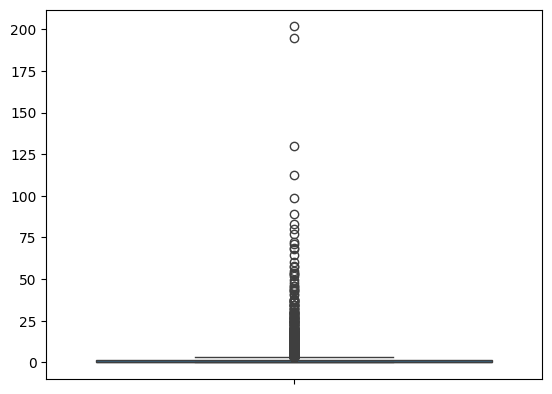

In [ ]:
# 9°) Vamos a examinar el BOXPLOT --->

sns.boxplot(reg_predict);

# Vamos a obtener un grafico parecido al que se obtuvo con los datos reales, la mayoria con valores procimos a 0 y algunos puntos
# con valores mucho mas altos.

### **ENTRENANDO UN GRADIENT BOOSTING**

Vamos a crear un nuevo modelo. Ya no va a ser más una regresión lineal, vamos a generar un nuevo tipo de modelo que funciona de una forma diferente.

Este modelo lo llamamos Gradient Boosting. Esta es la tercera versión de modelo del tercer modelo de Machine Learning que vamos a generar para nuestros datos, para intentar pronosticar el gasto. ¿Cómo funciona un Gradient Boosting?

A diferencia de la regresión lineal que genera un único predictor para intentar pronosticar o predecir los valores de toda la base, con Gradient Boosting, él va a generar varios predictores de forma secuencial donde el primero va a realizar su predicción y con el error que obtenga de esta predicción, va a llevarlo al segundo predictor para que el segundo predictor sepa dónde se equivocó el primero, aprenda para no repetir ese error y genere su predicción.

También se va a equivocar, va a generar un segundo error. Este segundo error lo va a llevar al tercer predictor, para que este tercer predictor aprenda de ese error, no lo repita y cada vez vaya generando predicciones o salidas más exactas. Interesante. Es así como funciona Gradient Boosting.

In [ ]:
# 1°) Importamos GRADIENT BOOSTING, existen varios 2 tipos: CLASSIFIER que pronostica por ejemplo si es un perro o un gato, REGRESSOR que es
# para resultados numericos, valores de gastos, etc. --->

from sklearn.ensemble import GradientBoostingRegressor

# Inicializamos:
gb = GradientBoostingRegressor(random_state=42)

In [ ]:
# 2°) Vamos a entrenar el modelo ---->

gb.fit(x_train, y_train) # Entreno cargando varios predictores

gb_predict = gb.predict(x_test) # Predicciones con valores reales de prueba que no fueron usados.

In [ ]:
# 3°) Inspeccionamos algunos valores de nuestro GRADIENT BOOSTING --->

gb_predict

# Tenemos valores Negativos al igual que en el modelo de Regresion Lineal

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [ ]:
# 4°) Sustituimos los valores Negativos a 0, que es lo minimo que el cliente puede gastar --->

gb_predict[gb_predict < 0] = 0
gb_predict
# Ya no tenemos los valores Negativos.

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [ ]:
# 5°) Vamos a ver los resultados --->

resultados = pd.DataFrame()
resultados["revenue"] = y_test
resultados["predict"] = gb_predict
resultados["error"] = gb_predict - y_test

In [ ]:
# 6°) Vamos a ver los resultados que si tienen gasto por parte de los clientes mayor a 0 --->

resultados[resultados.revenue > 0]

# Podemos ver que la diferencia NO es tan alta , por ejemplo valor real de una linea fue de 32 y la prediccion fue de 45, tenemos
# valores bien proximos entre el valore real y lo predicho.

,revenue,predict,error
3006,32.49,45.423628,12.933628
5928,74.85,0.000000,-74.850000
8361,424.50,35.721105,-388.778895
8612,55.99,21.136136,-34.853864
416,15.19,17.679543,2.489543
4077,5.97,9.928129,3.958129
8146,27.19,26.180193,-1.009807
4908,372.65,47.853577,-324.796423
9395,29.98,16.881575,-13.098425
8728,101.95,176.065289,74.115289


In [ ]:
# 7°) Vamos a examinar esos resultados con las METRICAS --->

print("MSE: ", metrics.mean_squared_error(y_test, gb_predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, gb_predict)))

# Habiamos obtenido 28 con el primer Modelo, 25 con el segundo Modelo y con GRADIENT BOOSTING obtenemos 23, quiere decir que esta ultima
# version del modelo es mucho mejor a las 2 anteriores ya que creamos predictores en Secuencia que iban aprendiendo de las primera ejecuaciones
# para NO repetir el mismo Error.
# Tambien podemos optimizar esto aun mas alterando los HIPERPARANETROS al momdento de generar o crear nuestro GRADIENT BOOSTING.

MSE:  533.6120092536612
RMSE:  23.10004349029805


***CONCLUSION (Importante):***

Hemos concluido el entrenamiento de Machine Learning para el marketing digital. En esta oportunidad o para este entrenamiento utilizamos como caso de estudio las visitas a un e-commerce, a Google Merchandising Store, donde hemos utilizado como ejemplo a nuestro querido José, que entra varias veces a la página web durante un periodo de tiempo y realiza diversas operaciones y compras en este site.

Para el marketing digital nosotros tenemos que enfocarnos en el caso de estudio, aprender qué significa cada variable que recibimos en nuestra base de datos o que tenemos disponible en nuestra base de datos para poder entender cuáles de estas informaciones son importantes para entender el comportamiento de los clientes en el negocio.

Una vez que nosotros recibimos estas informaciones de canal, del tipo de dispositivo, número de visita, fecha el tiempo, el gasto, etcétera, nosotros comenzamos a construir la parte técnica en nuestro Colab, en nuestro Google Colab, donde revisamos todas las informaciones que venían de Google Analytics que nosotros estamos viendo ahora en pantalla, decidimos cuáles eran importantes o no.

Comenzamos a eliminar algunas informaciones que no nos servían, comenzamos a transformar de JSON, porque algunas columnas estaban en tipo JSON, comenzamos a transformarlas a texto, luego nos dimos cuenta que el tipo de datos de las fechas estaban en número y no en texto.

Hemos tenido que recargar las bases con el tipo de dato correcto, hemos tenido que trabajar, bueno, con diccionarios, luego estamos eliminando informaciones que no estaban disponibles en la base de Google Analytics, no podemos llevar información sin valor a nuestro modelo de Machine Learning, informaciones nulas, informaciones en blanco, campos missing.

Tantas informaciones que nosotros teníamos que eliminar y lo hicimos prácticamente en los capítulos 1 y 2. Luego inicializamos la primera versión de nuestro modelo de Machine Learning utilizando únicamente variables cuantitativas, solamente las variables que podíamos agrupar y sumar, y totalizar.

Creamos así nuestra primera versión del modelo de Machine Learning, separando las bases X, y. Recuerden siempre X son las bases con las columnas de las variables predictoras sobre las cuales el modelo va a aprender y la variable y, la que tiene únicamente la variable de respuesta que el modelo va a utilizar para probar sus hipótesis, sus teorías.

Eso hicimos aquí con una regresión lineal muy simple, muy básica, utilizando únicamente variables cuantitativas. No nos fue muy bien en la evaluación de los resultados, obtuvimos resultados mayores a lo que el comportamiento de la base tenía, así que tuvimos que volver un paso atrás para modificar nuestro o mejorar nuestro feature engineering, utilizar variables, nuevas variables que habíamos descartado inicialmente.

Y fue así que incluimos las variables cualitativas, variables de texto. Para esto tuvimos que trabajar en otro capítulo completamente entero en transformar estas variables de texto en variables de valor, teníamos que decidir cuáles eran las que nos interesaban, hicimos bastantes transformaciones, bastantes joins.

Luego creamos nuevas variables en un aula completa. Creamos nuevas variables a partir de las variables originales, creamos variables de tiempos, variables de tiempos, utilizando variables de hora, de hora de acceso en la última y en la primera navegación, número de visitas. También creamos número de visitas, separamos las fechas en año, mes y día.

Hicimos muchas transformaciones para poder llevar las columnas cualitativas o de texto a nuestro modelo. Luego separamos la base, las transformamos en número porque no podemos llevar informaciones de texto a nuestro modelo Machine Learning. Tiene que estar en formato numérico.

Utilizamos el Label Encoder. Aprovechamos este concepto para poder transformar todas estas columnas y luego, comenzamos a crear la segunda versión nuestro modelo de regresión lineal que nos fue bastante bien. En los resultados ya teníamos un comportamiento parecido a los datos reales de nuestro banco de datos y los resultados fueron bastante próximos, solamente con un 25 de desviación estándar.

Pero no nos quedamos ahí, mejoramos nuestras variables utilizando Gradient Boosting. La verdad, utilizamos las mismas variables del segundo modelo, pero mejoramos el método que la máquina aprende sobre esta variable. Mejoramos el método de aprendizaje utilizando Gradient Boosting, creando varios predictores donde cada uno de ellos iba aprendiendo de la predicción anterior, se iba auto mejorando.

Esto de aquí es un concepto increíble y con eso obtuvimos un resultado mucho mejor. De 25 RMSE pasamos a 23 de RMSE, con lo que obtuvimos ya resultados mucho más precisos.

Y yo quiero dejarles como recado que no paren por aquí, que investiguen nuevas formas de mejorar, investiguen sobre hiperparámetros, investiguen sobre sobre modelos ensemble donde ustedes pueden conseguir resultados más exactos, accuracies, precisiones más exactas para un tipo de datos como el que hemos trabajado con e-commerce.
Bueno, espero que todo este conocimiento les sirva en su día a día del marketing digital. Hemos recreado prácticamente lo que hace un científico de datos en su día a día, el 70% del trabajo es preparación de los datos y 30% del tiempo es la parte divertida, generar un modelo de machine learning y hemos querido pasarle esta imagen a ustedes para que sepan cómo es el día a día en este mundo del data science.